# PCA, Classification, and Clustering

TA: Cheng Cao

Email: chengcao3-c@my.cityu.edu.hk

## PCA

![iris](https://miro.medium.com/max/1400/0*SHhnoaaIm36pc1bd)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

## 1 Iris Example

In [2]:
iris = datasets.load_iris()
X = iris.data # 4-dim
y = iris.target

### 1.1 Reduce the dimension of Iris Dataset from 4 to 2, and visualize the results. See if three kinds of flowers are differrent

In [3]:
pca_iris = decomposition.PCA(n_components=2)
pca_iris.fit(X)
X = pca_iris.transform(X)

principalDf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


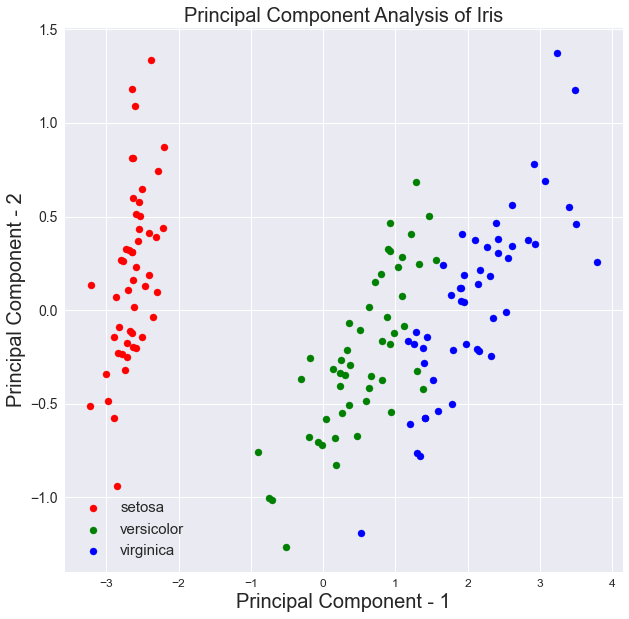

In [4]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Iris", fontsize=20)
targets = [0, 1, 2]
flowername = np.array(['setosa', 'versicolor', 'virginica'])
colors = ['r', 'g', "b"]
for target, color, name in zip(targets, colors, flowername):
    indicesToKeep = (y == target)
    plt.scatter(X[indicesToKeep, 0],X[indicesToKeep, 1] , c = color, s = 50, label = name)

plt.legend(flowername, prop={'size': 15})

### 1.2 What is the amount of variation caputred by PC1 and PC2, respectively

In [5]:
print(pca_iris.explained_variance_ratio_)

[0.92461872 0.05306648]


## 2 Breast Cancer Example

### 2.1 Reduce the dimension of Dataset breast cancer to 2 and visualize your results

Check the features of the breast cancer dataset, and generate dataframe: breast_df of combining "breast_data" and "breast_labels", and change the labels of "0,1" into "Benign, Malignant" separately.
Before modeling, we need to "center" and "standardize" our data by scaling. We scale to control for the fact that different variables are measured on different scales. We scale so that each predictor can have a "fair fight" against each other in deciding importance.

1.) Check the features and combine the dataframe;

2.) Please scale the features(x) using StandardScaler();

3.) x = x_scaled; y = labels

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
print(breast_data.shape)
print(breast_labels.shape)
features = breast.feature_names
print(features)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
import numpy as np

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_df = pd.DataFrame(final_breast_data)
features_labels = np.append(features,'label')
breast_df.columns = features_labels
breast_df['label'].replace(0, 'Benign', inplace=True)
breast_df['label'].replace(1, 'Malignant', inplace=True)
breast_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


### 2.2 Think about why we need to normalize the features

In [8]:
x = breast_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
y = breast_df['label']

In [9]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [10]:
pca_breast = decomposition.PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_df = pd.DataFrame(data = principalComponents_breast, 
                                   columns = ['principal component 1', 'principal component 2'])
principal_breast_df.head(6)

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
5,2.380247,3.949929


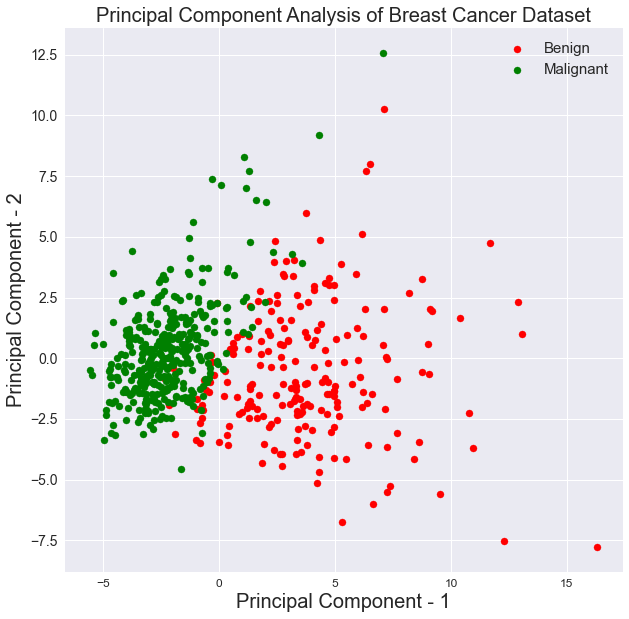

In [11]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = (breast_df['label'] == target)
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'], 
                principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets, prop={'size': 15})

### 2.3 What is the amount of variation caputred by PC1 and PC2, respectively

In [12]:
print(pca_breast.explained_variance_ratio_)

[0.44272026 0.18971182]


## Classification

## 1 Random Forest applied with Breast Cancer dataset

### 1.1 Perform random forest into breast data set with max_depth=2, random_state=0, and check the score

The recall score is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split

# we have to split data set into training and testing cohorts in the classification 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
rfc_breast = RandomForestClassifier(max_depth=2, random_state=0)
rfc_res = rfc_breast.fit(x_train, y_train)

In [14]:
x[0] #first sample 

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [15]:
x_pre = x[0].copy()
x_pre[-5:] =  0 
print(x_pre)
rfc_breast.predict(x_pre.reshape(1,-1))

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  0.          0.          0.          0.          0.        ]


array(['Benign'], dtype=object)

In [16]:
# test the model
rfc_breast.score(x_test,y_test)

0.9521276595744681

### 1.2 Which features are more important for RF and which are not. Here we can utilize the "features_importances_" methods to visualize the features' importances.

If we are curious to see which features are most important to the Random
Forest model to predict breast cancer, we can visualize and quantify the
importances by calling the "feature _importances."method:

In [17]:
feats = {}
for feature, importance in zip (features, rfc_breast.feature_importances_):
    feats[feature]= importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values (by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

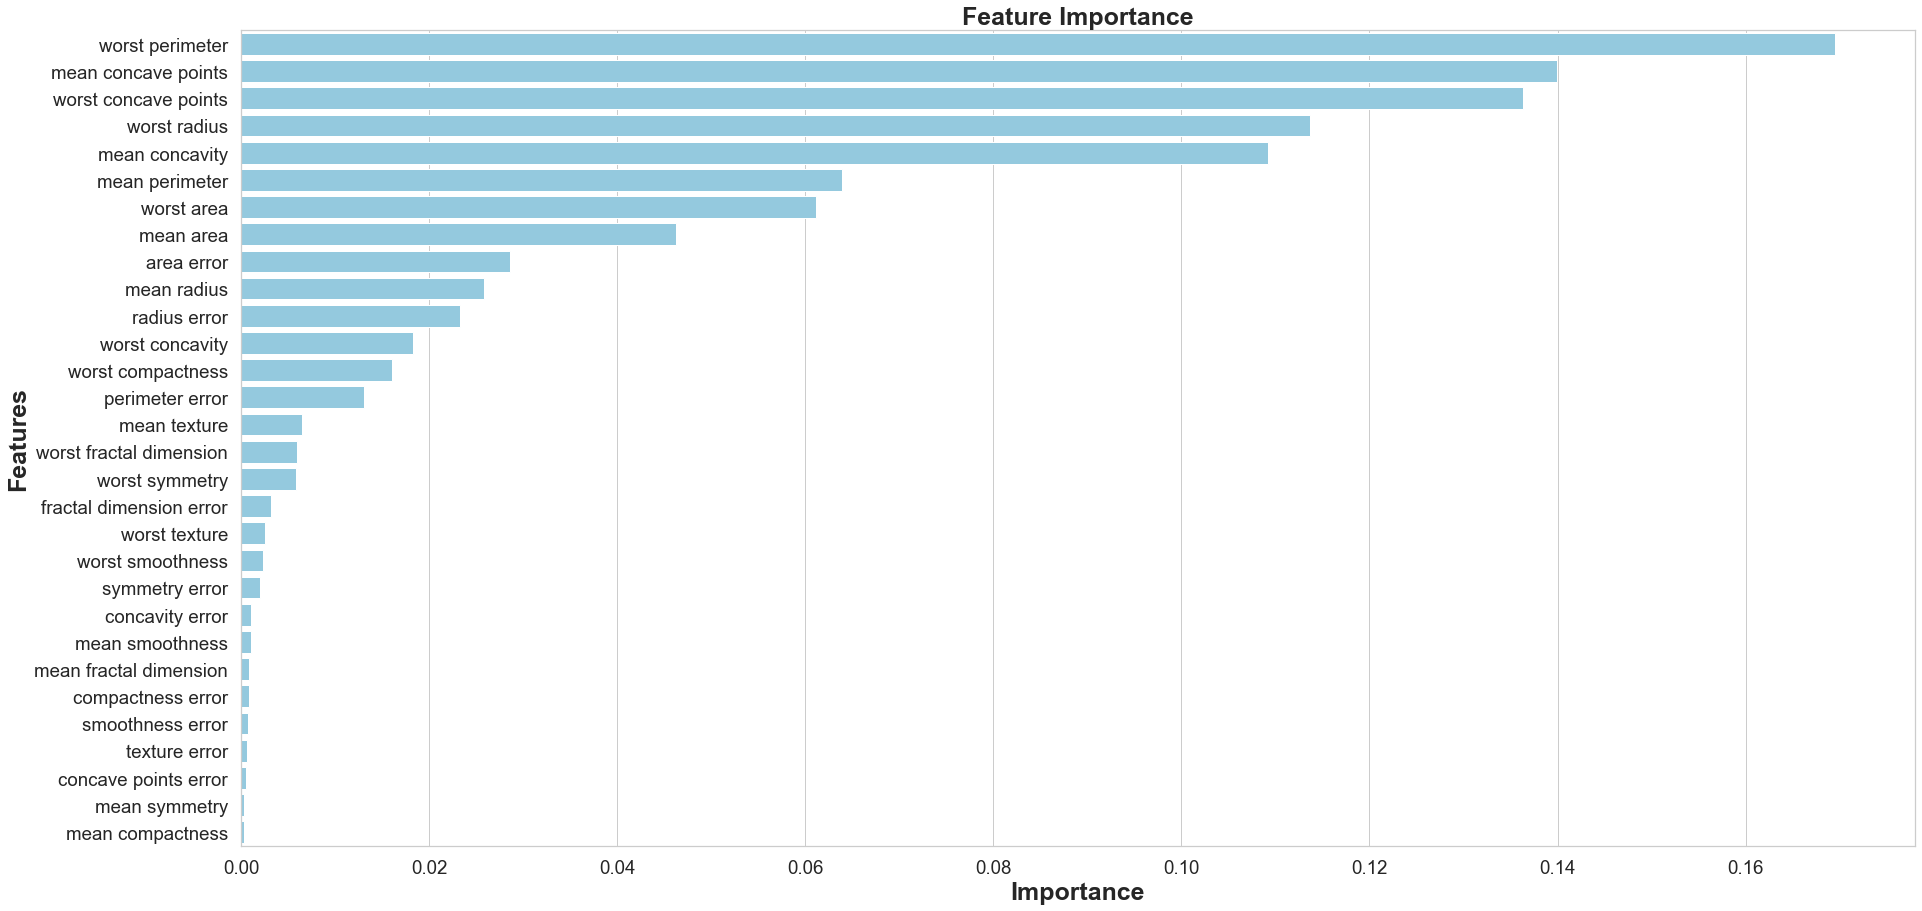

None

,Features,Gini-Importance
0,worst perimeter,0.169533
1,mean concave points,0.139921
2,worst concave points,0.136289
3,worst radius,0.113697
4,mean concavity,0.109173
5,mean perimeter,0.063963
6,worst area,0.061151
7,mean area,0.046286
8,area error,0.028574
9,mean radius,0.025884


In [18]:
import seaborn as sns
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots ()
fig.set_size_inches (30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel( 'Importance', fontsize=25, weight="bold")
plt.ylabel( 'Features' , fontsize=25, weight = "bold")
plt.title( 'Feature Importance', fontsize=25, weight='bold')
display(plt.show())
display(importances)

### 1.3 How could we improve our baseline model? Using dimension reduction, we can approximate the original dataset with fewer variables while reducing computational power to run our model. Using PCA, determine the number of components needed for the data set to explain 95% variance

1.) Decide the number of components by the variance > 95%. 

2.) Perform PCA

3.) Each component is a linear combination of the original variables with corresponding "weights". Prints the weights dataframe for each component.

In [19]:
# determine the number of components, for we want to keep as more information as much but we do want to reduce the computational burden
pca_breast = decomposition.PCA(n_components=features.shape[0])
principalComponents_breast = pca_breast.fit_transform(x)

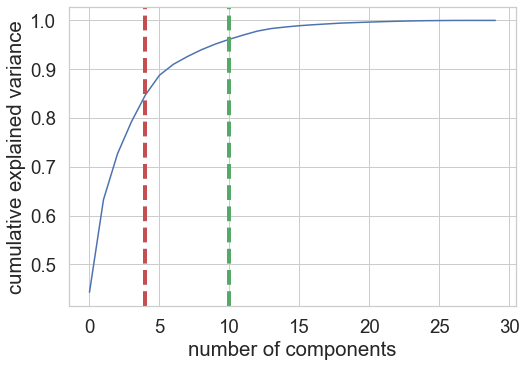

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.442720,0.442720
1,0.632432,0.189712
2,0.726364,0.093932
3,0.792385,0.066021
4,0.847343,0.054958
5,0.887588,0.040245
6,0.910095,0.022507
7,0.925983,0.015887
8,0.939879,0.013896
9,0.951569,0.011690


In [20]:
plt.plot(np.cumsum(pca_breast.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r',linestyle= "--", x = 4, ymin = 0, ymax=1)
plt.axvline(linewidth=4, color='g',linestyle= "--", x = 10, ymin = 0, ymax=1)
display(plt.show())

evr = pca_breast.explained_variance_ratio_
cvr = np.cumsum(pca_breast.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

Looking at the figure above, when we use PCA to reduce our 30 predicting variables down to 10 components, we can still explain over
95% of the variance. The other 20 components explain less than 5% of the variance, so we can cut them. Using this logic, we will use PCA to reduce
the number of components from 30 to 10 for x.

In [21]:
pca = decomposition.PCA(n_components=10)
pca.fit(x)
x_pca = pca.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [22]:
rfc_breast = RandomForestClassifier(max_depth=2, random_state=0)
rfc_res = rfc_breast.fit(x_train, y_train)

In [34]:
rfc_breast.score(x_test,y_test)

0.9095744680851063

Each component is a linear combination of the original variables with
corresponding "weights". We can see these "weights" for each PCA
component by creating a dataframe.

In [24]:
pca_dims=[]
for x in range(1, len(pca_df)+1):
    pca_dims.append( 'PCA Component{}'.format(x))

pca_df = pd.DataFrame(pca_breast.components_, columns = features, index=pca_dims)
pca_df.head(10).T

,PCA Component1,PCA Component2,PCA Component3,PCA Component4,PCA Component5,PCA Component6,PCA Component7,PCA Component8,PCA Component9,PCA Component10
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,-0.044424,-0.119431,0.295760,-0.177121,-0.123741,0.081103


## Clustering

## 1 K-Means Clustering on Handwritten Digits

![mnist](https://johnloeber.com/images/mnist.png)



We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [25]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


First, we apply PCA to reduce the dimension form 64 into 2, and then apply k means to do clustering

In [26]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=10, n_init=4)

Visualize your clustering results

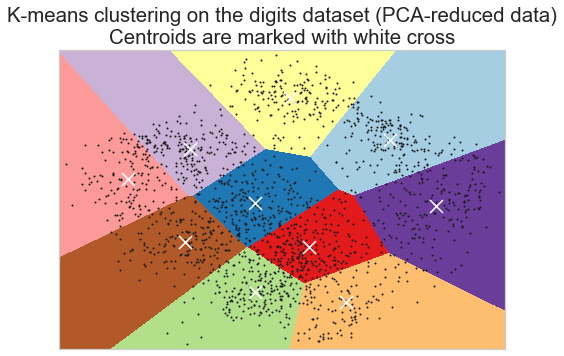

In [27]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=4)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 2 Swiss Roll Dataset

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram).
Here we run hierarchical clustering on their position.

In [28]:
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll
import time as time
# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, colors= make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5



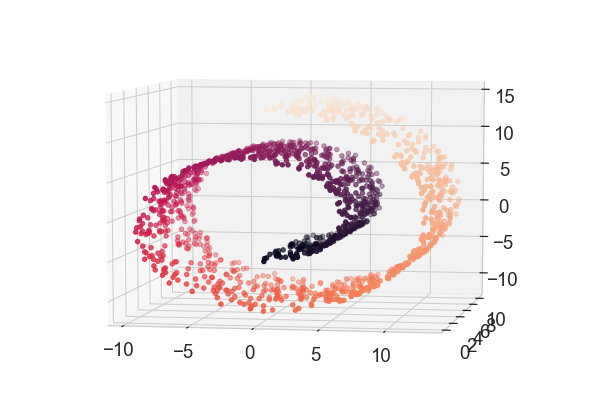

In [29]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20,c = colors)

plt.show()

In [30]:
# #############################################################################
# Compute clustering
print("Compute clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)

print("Number of points: %i" % label.size)


Compute clustering...
Elapsed time: 0.05s
Number of points: 1500


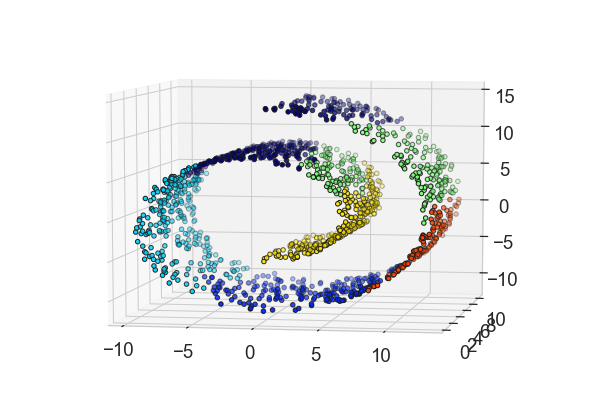

In [31]:
# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )


### 2.1 Agglomerative clustering with using PCA 

Text(0.5, 1.0, 'PCA')

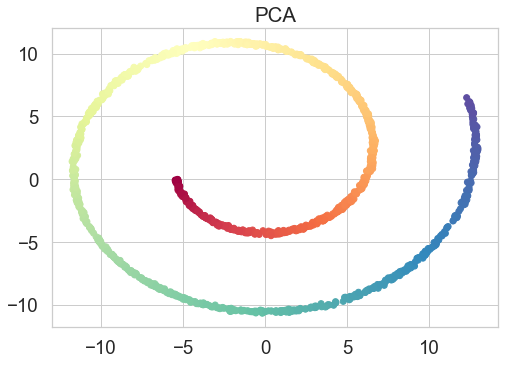

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap=plt.cm.Spectral)
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

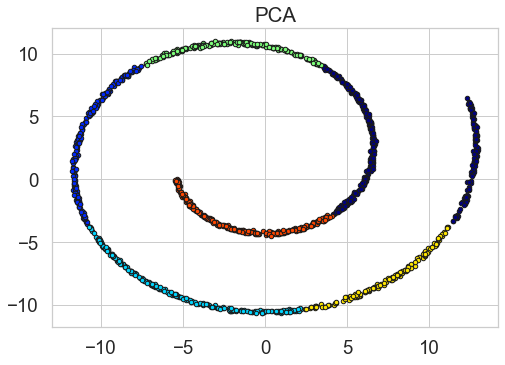

In [33]:
ward_pca = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X_pca)
fig = plt.figure()
ax = fig.add_subplot(111)
label = ward_pca.labels_
for l in np.unique(label):
    ax.scatter(
        X_pca[label == l, 0],
        X_pca[label == l, 1],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
# ax.scatter(ward_pca[:, 0], ward_pca[:, 1], c=colors, cmap=plt.cm.Spectral)
plt.title("PCA")